In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import scoreatpercentile as pct
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

/Users/saksham/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
ica_df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv", index_col = 0)
ica_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [8]:
categoricals_df = ica_df.select_dtypes('object')
categoricals_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [16]:
categoricals_df.education.unique()


array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [18]:
categoricals_df.policy.unique()

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

In [33]:
categoricals_df['policy'] = categoricals_df['policy'].replace({'corporate l3':'corporate', 
                                                               'corporate l2':'corporate',
                                                               'corporate l1': 'corporate',
                                                              "personal l3": "personal",
                                                              "personal l2": "personal",
                                                              "personal l1": "personal",
                                                              'special l1': 'special',
                                                              'special l2': 'special',
                                                              'special l3': 'special'})
categoricals_df.policy.unique()

array(['corporate', 'personal', 'special'], dtype=object)

In [29]:
categoricals_df.vehicle_class.value_counts()


four-door car    5416
two-door car     2193
suv              2109
sports car        564
luxury suv        214
luxury car        193
Name: vehicle_class, dtype: int64

In [32]:
categoricals_df['vehicle_class'] = categoricals_df['vehicle_class'].replace({'sports car':'luxury car', 
                                                               'luxury suv':'luxury car',})
categoricals_df.vehicle_class.value_counts()

four-door car    5416
two-door car     2193
suv              2109
luxury car        971
Name: vehicle_class, dtype: int64

#### One Hot encoding of categorical variables
#### categoricals=pd.get_dummies(categoricals, drop_first=True)

In [48]:
categoricals_df= pd.get_dummies(ica_df[["region","response", "coverage","education","effective_to_date","month", "employment_status",
                       "gender","location_code","marital_status", "policy_type", "policy","renew_offer_type", "sales_channel"
                      , "vehicle_class", "vehicle_size"]], drop_first=True)

In [39]:
numerical_df = ica_df._get_numeric_data()
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [49]:
# X Y split
X = numerical_df.drop('total_claim_amount', axis=1)
y = numerical_df.total_claim_amount


In [50]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,15,31,1,7
...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [51]:
X = pd.concat([categoricals_df, X], axis = 1)
X

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,4809,48029,61,7,52,0,9
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,2228,26794,64,3,26,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,14947,22139,100,34,31,0,2
3,0,1,0,1,1,0,1,0,0,0,...,0,1,0,22332,49078,97,10,3,0,2
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,9025,23675,117,15,31,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,1,0,15563,64811,253,8,40,2,7
10685,0,1,0,0,0,0,1,0,0,0,...,0,1,0,5259,61146,65,7,68,0,6
10686,0,0,0,0,1,0,0,0,0,0,...,0,1,0,23893,39837,201,11,63,0,2
10687,0,0,1,0,0,1,1,0,0,0,...,0,1,0,11971,64195,158,0,27,4,6


In [52]:
# Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)

In [54]:
#Standardize the data.
std_scaler = StandardScaler().fit(X_train)   
X_train_scaled = std_scaler.transform(X_train)

In [55]:
X_test_scaled=std_scaler.transform(X_test)

In [56]:
X_train.shape

(7482, 108)

In [57]:
#Model fitting
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [58]:
print("coef ", model.coef_)
print("intercept:", model.intercept_)

coef  [ 2.89752123e+00  5.30605387e-01  3.98998523e+00 -9.41389292e+00
 -5.60987038e+00 -4.03617425e+00 -3.93785601e+00 -3.21311648e+00
  1.98188593e+00 -3.39503037e+00 -1.25957858e+00 -9.43282198e-01
 -1.15532801e+00  3.18684800e+00 -1.01175988e+00 -7.61685537e-01
 -1.31451814e+00 -1.20025338e+00 -1.42481609e+00 -2.18763915e+00
  1.27564455e+00  1.67422540e+00 -1.90450618e+00  1.85200348e-01
 -2.80823898e+00 -3.61201557e+00 -1.52945493e+00  1.87921223e+00
  1.97368696e-01 -9.73876485e-01  2.17095094e+00  1.03849538e+00
 -2.00957508e+00 -3.66526757e+00 -5.21115666e-01  5.95529331e-01
 -4.00384608e-01 -2.44518344e+00 -1.45524649e+00 -3.61522846e+00
  4.95669105e+14  5.04868072e+14  5.15673950e+14  4.95669105e+14
  4.48699816e+14  5.24495440e+14  4.42454876e+14  4.76698829e+14
  4.36115257e+14  4.70848167e+14  5.04868072e+14  4.88175736e+14
  4.48699816e+14  4.88175736e+14  4.97523531e+14  4.62924563e+14
  4.60920995e+14  5.04868072e+14  5.01210273e+14  5.01210273e+14
  5.06686315e+14  5

In [59]:
#Making prediction
y_pred = model.predict(X_test_scaled)   # model prediction

y_pred_train = model.predict(X_train_scaled)

In [60]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [61]:
y_pred

array([457.00943051, 390.0740091 , 143.73212307, ..., 579.18753209,
       -31.03631169, 484.17074808])

In [62]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
4665,345,457.009431
4072,345,390.074009
4549,257,143.732123
4211,445,404.269504
3081,523,434.761020
...,...,...
3488,404,341.034363
1667,554,527.831839
1516,350,579.187532
10215,27,-31.036312


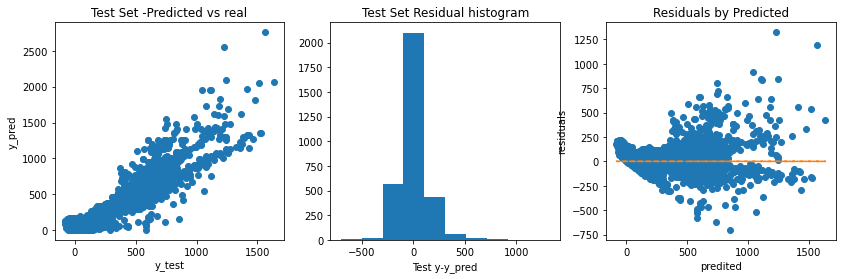

In [63]:

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [64]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
print(np.sqrt(mse(y_test,y_pred)))

19182.465952959454
95.8137819863208
138.50077961137782


In [65]:
##prediction on the train set
mse(y_train,y_pred_train)

19656.866837729656

In [66]:
R2=r2_score(y_test,y_pred)
R2

0.7700358408283636

In [67]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print(R2_test)
print(R2_train)

0.7700358408283636
0.7727545169468237


In [68]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7620190141044977